<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DLBasic/IntroDLwithPytorch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network 
합성곱 신경망에 대하여.

## CNN의 개요
CNN은 이미지 처리에서 탁월한 성능을 보여주는 방식의 신경망이다.

### CNN의 구조
CNN은 크게
- 합성곱 신경망 (Convolution Layer)
- ReLU
- 풀링층 (Pooling Layer)

3개의  구조로 구성되어 있다. 각각에 대해 알아보자.

### 합성곱 신경망의 목적

이미지 분류 처리에서, 컴퓨터는 픽셀로 그림을 인식한다. 사람이 보기엔 글자가 유사, 구분이 되겠으나 픽셀 위치가 아예 틀리면 컴퓨터는 그걸 아예 다르다고 인식할 것이다.

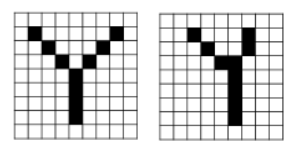

따라서 공간적인 구조 정보를 보존하면서 학습할 방법이 필요하고, 이를 위해 사용하는 것이 합성곱 신경망이다.

### 채널

이미지는 (높이, 너비, 채널)의 3차원 텐서로 구성된다.
- 높이 : 세로 방향 픽셀 수
- 너비 : 가로 방향 픽셀 수
- 채널 : 색 정보.

흑백일 경우 채널이 1개,  색상이 있을 경우 RGB의 조합이므로 3개의 채널을 가진다.

### 합성곱 연산의 방법
합성곱 연산을 통해 이미지의 특성을 추출하게 된다.   
Kernel(Filter)라고 불리는 행렬을 사용하여 이미지와 커널을 겹쳐보며, 원소의 값을 곱해 모두 더한 값을 출력으로 가지게 된다. 

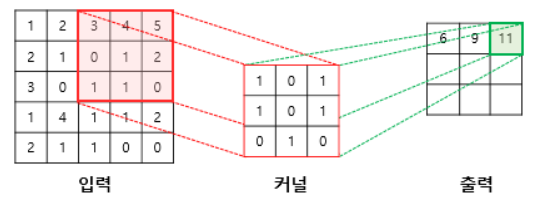

커널을 가장 왼쪽 상단부터, 오른쪽 하단까지 차례로 훑으며 계산하면 된다.  
이 과정을 통해 출력층에서 얻게 되는 것은 **특성 맵(feature map)이 된다.**

또한, 위의 예제에서는 커널을 한칸식만 움직였지만, 실제로는 커널을 움직일 수 있는 칸수도 지정이 가능하며, 이를 **stride**라고 한다.



### 패딩, 풀링

한편, 위의 연산과정 특성상 출력층의 크기는 계속 작아지는데, 만일 특성 맵의 크기를 유지하고 싶을 경우, **입력층 테두리를 0으로 둘러쌀 수 있다. 이를 패딩**(Padding) 이라고 한다.

특성 맵의 크기를 유지하는 방법이 있다면, 특성 맵의 크기를 더 줄여 버리느 방법도 존재하는데 이는 Pooling에 해당된다. 풀링의 경우는 커널과 stride의 개념이 동일하게 적용되는데 stride마다, 최댓값이나 평균값을 적용하여 다운샘플링을 실시하게 된다.

### 가중치, 편항, 채널
CNN에서 가중치의 역할은 Kernel이 하게 된다.  
즉, 다층 퍼셉트론보다 더 적은 가중치를 바탕으로 공간적 구조를 보존할 수 있게 된다.

최종적으로 얻은 출력층에  편향을 더하여 특성 맵을 만들어도 무방하다. 이 경우 커널을 적용한 결과의 모든 원소마다 편향값을  동등하게 더하게 된다.

한편, 채널이 여러개(RGB 상황 등)인 경우, 채널 개수 만큼의 커널이 필요하다. 각 채널마다 합성곱을 계산하고 합성곱 계산을 모두 더한 것이 최종 특성 맵이 된다.

## Example - CNN으로 MNIST 분류하기

### Architecture of Model
- 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

- 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

- 3번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
전결합층(뉴런 10개) + 활성화 함수 Softmax

In [1]:
# 필요한 패키지 init
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
# 필요한 도구 설정

# 입력층 설정
# 배치 크기 × 채널 × 높이(height) × 너비(widht)의 크기의 텐서를 선언
inputs = torch.Tensor(1, 1, 28, 28)

# 첫 번째 합성곱층
# 1채널을 입력받아, 32채널을 뽑아내는데 커널은 3, 패딩은 1
conv1 = nn.Conv2d(1, 32, 3, padding = 1)

# 두 번째 합성곱층
# 32채널을 입력받아, 64 채널을 뽑아내는데 커널은 3, 패딩은 1
conv2 = nn.Conv2d(32, 64, 3, padding = 1)

# 맥스풀링, 숫자 하나만 인자로 넣으면  커널, 스트라이드 모두 해당 값으로 지정됨
pool = nn.MaxPool2d(2)

이를 다음과 같은 순서로 연결하려고 한다.  
입력층 -> 첫번째 합성곱층 -> 맥스풀링 -> 두번째 합성곱층 -> 맥스풀링 -> 전결합층으로 10개 차원의 텐서로 변환

### MNIST 분류 문제 코드

In [2]:
# 1단계. 학습 파라미터 설정
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [3]:
# 2단계. 데이터셋 설정 train/test 도 미리 분류
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
# 2-1. 여기서 배치 크기도 지정해야 한다.
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
# 3단계. class로 구현하기!

class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화 (Linear...)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten # 2차원을 1차원으로 해야한다.
        out = self.fc(out)
        return out

In [ ]:
model = CNN()

In [10]:
criterion = torch.nn.CrossEntropyLoss()  # 이미 비용함수에 소프트맥스 포함
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### 훈련 실행

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader:
    optimizer.zero_grad() #  매 시기마다 미분계수 초기화
    hypo = model(X)
    cost = criterion(hypo, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.241804257
[Epoch:    2] cost = 0.0649393871
[Epoch:    3] cost = 0.0479050912
[Epoch:    4] cost = 0.0389764011
[Epoch:    5] cost = 0.0324103311
[Epoch:    6] cost = 0.0267148949
[Epoch:    7] cost = 0.0231101848
[Epoch:    8] cost = 0.0189635921
[Epoch:    9] cost = 0.016485434
[Epoch:   10] cost = 0.0139167132
[Epoch:   11] cost = 0.0114422506
[Epoch:   12] cost = 0.0106035313
[Epoch:   13] cost = 0.00883744191
[Epoch:   14] cost = 0.00752303982
[Epoch:   15] cost = 0.00755542237


In [ ]:
# Test
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9807999730110168


### Remark. 만일, 층이 더 깊어진다면 더 좋을까?


In [5]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))

        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [8]:
model = CNN()

In [12]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.174030244
[Epoch:    2] cost = 0.0506435446
[Epoch:    3] cost = 0.0348914564
[Epoch:    4] cost = 0.0270264074
[Epoch:    5] cost = 0.0237279683
[Epoch:    6] cost = 0.0177109856
[Epoch:    7] cost = 0.0169440508
[Epoch:    8] cost = 0.0133793326
[Epoch:    9] cost = 0.0120607363
[Epoch:   10] cost = 0.0118897445
[Epoch:   11] cost = 0.00896919519
[Epoch:   12] cost = 0.0108754234
[Epoch:   13] cost = 0.00781325437
[Epoch:   14] cost = 0.00713085011
[Epoch:   15] cost = 0.00742920395


In [13]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9884999990463257


Remark. 그러나 층을 더 깊게 쌓는다고, 무조건 더 좋은 결과를 얻는다는 보장이 없다.